In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [4]:
dataset = pd.read_csv("kc_house_data.csv")
space=dataset['sqft_living']
price=dataset['price']

In [9]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [8]:
x = np.array(space).reshape(-1, 1)
y = np.array(price)

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=0)

y.ravel()

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [14]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#Predicting the prices
pred = regressor.predict(xtest)

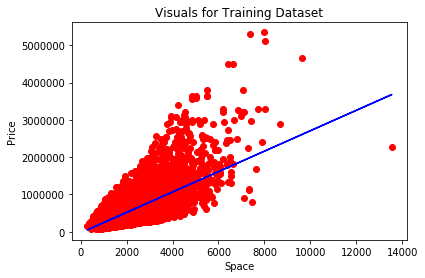

In [16]:
#Visualizing the training Test Results 
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

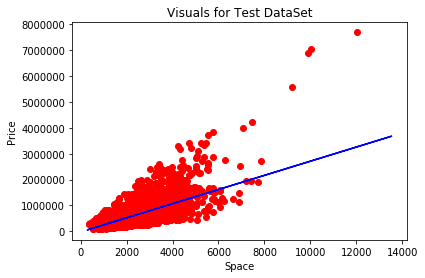

In [19]:
#Visualizing the Test Results 
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtest, regressor.predict(xtest), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

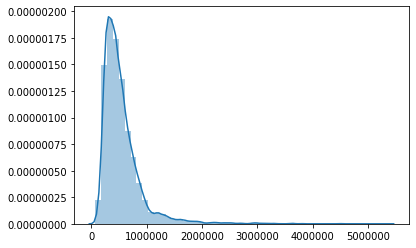

In [24]:
sns.distplot(ytrain)

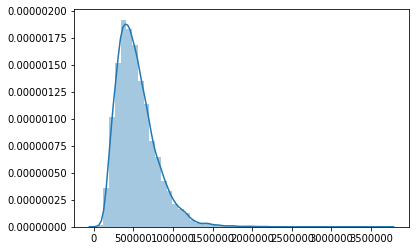

In [25]:
sns.distplot((regressor.predict(xtrain)))

In [28]:
#Line of Best Fit (Least Square Method)
#https://www.varsitytutors.com/hotmath/hotmath_help/topics/line-of-best-fit

In [39]:
y_pred = regressor.predict(xtest)

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

print('Root Mean Squared Error:',metrics.r2_score(xtest, regressor.predict(xtest)))

Mean Absolute Error: 172649.01126504192
Mean Squared Error: 72169122334.16643
Root Mean Squared Error: 268643.1133198214
Root Mean Squared Error: -422413.7503127958


In [41]:
#Gradient Descent

def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
     N = float(len(y))
     for i in range(epochs):
         y_current = (m_current * X) + b_current
         cost = sum([data**2 for data in (y-y_current)]) / N
         m_gradient = -(2/N) * sum(X * (y - y_current))
         b_gradient = -(2/N) * sum(y - y_current)
         m_current = m_current - (learning_rate * m_gradient)
         b_current = b_current - (learning_rate * b_gradient)
     return m_current, b_current, cost

In [ ]:
m_current, b_current, cost = linear_regression(xtest, ytest, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001)
print(m_current, b_current, cost)

In [ ]:
#Above : 
#X and y are our input parameters. On the other hand, m_current and b_current are our slope and bias terms respectively, 
#both of which will be updated as we try to find the best numbers so that the equation we get best fits our data.
#Here epochs refer to the number of times we train our model to find the best slope and bias for our model to fit the data.
#Finally, learning_rate here refers to the speed of convergence, meaning how fast gradient descent finds the best parameters.